# NN Tutorial

In [1]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random

In [2]:
tf.__version__

'2.0.0-rc0'

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [4]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)


0


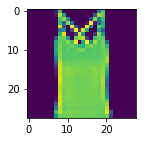

1


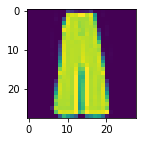

2


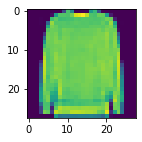

3


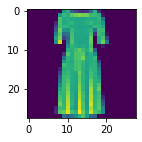

4


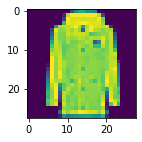

5


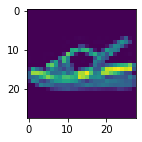

6


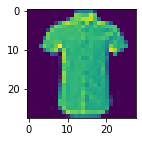

7


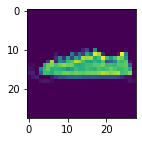

8


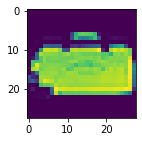

9


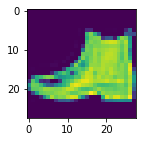

In [5]:
flag = 0
while(flag<10):
    ran_num = random.randint(0,59999)
    if (y_train[ran_num]==flag):
        print(flag)
        plt.figure(figsize=(2,2))
        plt.imshow(X_train[ran_num])
        plt.show()
        flag = flag+1

In [6]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5308 - sparse_categorical_accuracy: 0.81084s - loss: 0.6881 - sparse_categorica - ETA: 3s - l


In [13]:
inputs = tf.keras.Input(shape=(784,))
Model = tf.keras.layers.Dense(units=128, activation='relu')(inputs)
Model = tf.keras.layers.Dropout(0.2)(Model)
outputs = tf.keras.layers.Dense(units=10, activation='softmax')(Model)
Model = tf.keras.Model(inputs, outputs)



In [14]:
Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [16]:
Model.fit(X_train, y_train, epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5322 - sparse_categorical_accuracy: 0.8132


In [17]:
test_img = random.randint(0,9999)
test_data = tf.expand_dims(X_test[test_img], axis=0)
predict = Model.predict(test_data)

In [18]:
print("test_img:", test_img)
print("predict: ", predict)

test_img: 6180
predict:  [[1.4487795e-05 9.9866202e-07 5.6127756e-06 7.9368547e-06 6.8670764e-05
  9.8619568e-01 2.2799935e-05 1.5832414e-03 8.7658521e-03 3.3347076e-03]]


In [19]:
max_val = tf.math.reduce_max(predict)
max_arg = tf.math.argmax(predict[0])
print("show max value: ", max_val)
print("show max value place: ", max_arg)

show max value:  tf.Tensor(0.9861957, shape=(), dtype=float32)
show max value place:  tf.Tensor(5, shape=(), dtype=int64)


category: Sandal


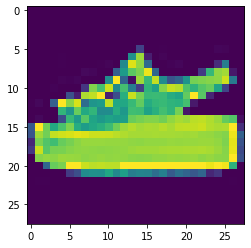

In [20]:
print("category:", class_names[max_arg])
plt.imshow(X_test[test_img].reshape(28, 28))